## Programming Exercise 2: Logistic Regression

### Setup

In [13]:
# Setup Code
import numpy as np
import matplotlib.pyplot as plt
# For that Surface plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# For the minimization function
from scipy.optimize import minimize
data1 = np.loadtxt('ex2data1.txt',delimiter=',')
data2 = np.loadtxt('ex2data2.txt',delimiter=',')

x1 = data1[:,[0,1]]
y1 = data1[:,2]
x2 = data2[:,[0,1]]
y2 = data2[:,2]

m1 = len(y1)
m2 = len(y2)

### Initial Plot of the data

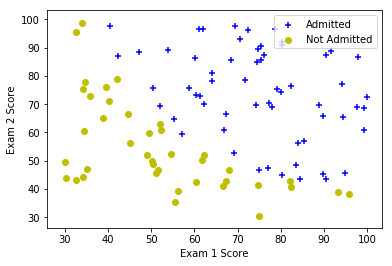

In [14]:
pos = np.where(y1 == 1)
neg = np.where(y1 == 0)

plt.scatter(x1[pos,0],x1[pos,1], color='b', marker='+', 
                                        label='Admitted')
plt.scatter(x1[neg,0],x1[neg,1], color='y', marker='o',
                                        label='Not Admitted')
plt.ylabel('Exam 2 Score')
plt.xlabel('Exam 1 Score')
plt.legend(loc='upper right')

plt.show()

### Implementation

In [27]:
# the sigmoid function
def sigmoid(z):
    g = 1. / (1. + np.exp(-z))
    return g

# the logistic regression cost function
def cost_function(theta, x, y):
    m = y.size
    h = sigmoid(np.dot(x, theta))
    J = -1. / m * (np.dot(y, np.log(h)) + np.dot((1-y),np.log(1 - h)))
    grad = 1. / m * np.dot((h - y), x)

    return J, grad


# Adding the intercept term to X1
r, c = x1.shape
x11 = np.ones((r, c+1))
x11[:, [1,2]] = x1

initial_theta = [0, 0, 0]
J, grad = cost_function(initial_theta, x11, y1)

print 'Cost at initial theta: %f' % (J)
print 'Gradients at initial theta:'
print grad

test_theta = [-24, 0.2, 0.2]
J, grad = cost_function(test_theta, x11, y1)
print '\n'
print 'Cost at test theta: %f' % (J)
print 'Gradients at test theta:'
print grad

Cost at initial theta: 0.693147
Gradients at initial theta:
[ -0.1        -12.00921659 -11.26284221]


Cost at test theta: 0.218330
Gradients at test theta:
[ 0.04290299  2.56623412  2.64679737]


### Learning parameters

Using scipy's minimize function

In [28]:
opt = minimize(cost_function, initial_theta, args=(x11,y1), method=None,
               jac=True, options = {'maxiter':400})

print "Cost at test initial theta found with scipy.optimize: %f" % opt.fun
print "Calculated Gradients" 
print opt.x

Cost at test initial theta found with scipy.optimize: 0.203498
Calculated Gradients
[-25.16133284   0.2062317    0.2014716 ]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


### Decision boundary

In [34]:
plt.scatter(x1[pos,0],x1[pos,1], color='b', marker='+', 
                                        label='Admitted')
plt.scatter(x1[neg,0],x1[neg,1], color='y', marker='o',
                                        label='Not Admitted')

# x11_min, x11_max = x11[:,1].min(),x11[:,1].max()
# x12_min, x12_max = x11[:,2].min(),x11[:,2].max()
# x11_space = np.linspace(x11_max, x11_min)
# x12_space = np.linspace(x12_max, x12_min)

plt.ylabel('Exam 2 Score')
plt.xlabel('Exam 1 Score')
plt.legend(loc='upper right')

plt.show()

ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)